# Домашнее задание № 2

## по дисциплине: Алгоритмы анализа данных

## Тема: Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

### выполнил: Евгений Кириллов

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

L1 регуляризация

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

L2 регуляризация

f(x, W) + (lambda_/2) * np.sum(W**2)

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

### Задание 1

Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [7]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        
    return W

Функция eval_model_reg2, которая была приведена в материалах урока, не является полноценной функцией L2-регуляризации (я предполагаю), т.к. вместо f(x, W) + (lambda_/2) * np.sum(W^2), там f(x, W) + lambda_ * W. Тем не менее строим график зависимости весов всех признаков от lambda в приведённой выше регуляризации:

In [8]:
lambda_space = np.linspace(1e-08, 3, 100)
for i, l in enumerate(lambda_space):
    if i == 0:
        W = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l)
        continue
    
    W = np.vstack((W, eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l)))

In [9]:
W

array([[56.49999962,  6.19560095,  0.13438971,  6.17194872],
       [55.65671608,  6.02802395,  0.48481282,  5.90250367],
       [54.83823498,  5.87797355,  0.78064708,  5.67300457],
       [54.04347797,  5.74271051,  1.03167637,  5.4760409 ],
       [53.2714283 ,  5.61999942,  1.24574455,  5.30570649],
       [52.52112651,  5.5080074 ,  1.42916527,  5.15727705],
       [51.79166643,  5.40522423,  1.58704153,  5.02695933],
       [51.08219156,  5.31039942,  1.72351537,  4.91169577],
       [50.39189168,  5.22249228,  1.84196358,  4.8090118 ],
       [49.7199998 ,  5.14063235,  1.94515142,  4.71689641],
       [49.06578928,  5.0640878 ,  2.03535372,  4.63370835],
       [48.42857124,  4.99224027,  2.11445051,  4.55810233],
       [47.80769213,  4.92456457,  2.18400283,  4.48897076],
       [47.20253147,  4.86061241,  2.24531294,  4.4253977 ],
       [46.61249983,  4.79999928,  2.29947233,  4.36662227],
       [46.03703688,  4.74239373,  2.34740012,  4.31200951],
       [45.4756096 ,  4.

Text(0, 0.5, 'weights')

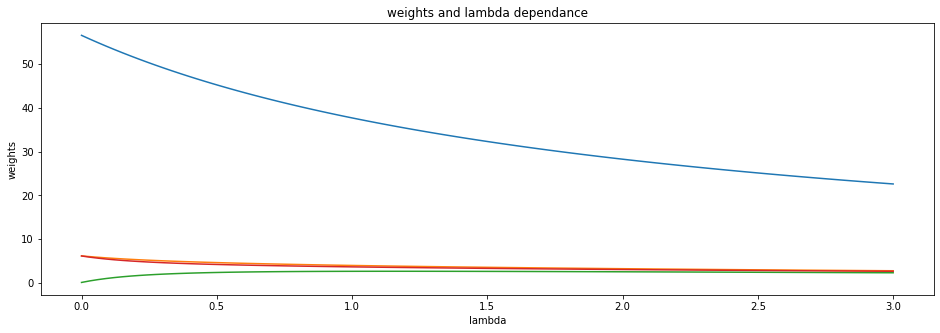

In [10]:
plt.figure(figsize=(16, 5))
plt.plot(lambda_space, W)

plt.title('weights and lambda dependance')
plt.xlabel('lambda')
plt.ylabel('weights')

### Задание 2

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

ответ: да, а чего бы нет

### Задание 3

Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [12]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sum(np.abs(W)))
        
    return W